In [ ]:
#importing the dataset from desktop
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv ("Market Basket Analysis - Groceries_dataset.csv")

In [3]:
df.head()

,Member_number,Date,Item Description
0,1808,21-07-2015,tropical fruit
1,2552,5/1/2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,1/2/2015,whole milk



# DATA_PREPARATION


In [4]:
## 
# Checking the data type for validation purpose and to determine if there will be a need to change the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Member_number     38765 non-null  int64 
 1   Date              38765 non-null  object
 2   Item Description  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
#checking for availability of null values
df.isnull().sum().sort_values(ascending = False)

Member_number       0
Date                0
Item Description    0
dtype: int64

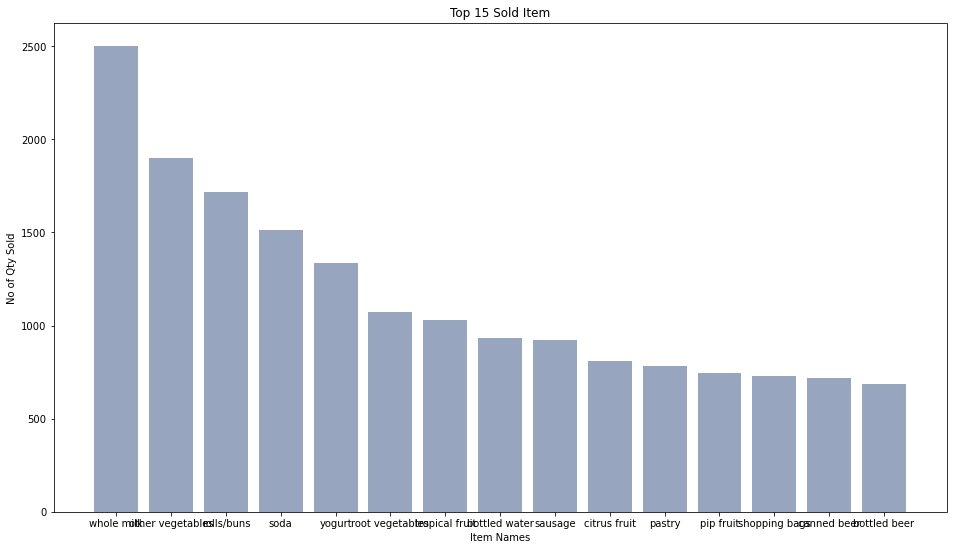

In [6]:
#Trying to create distribution for item sold to determine the highest sold product 
product_distr = df.groupby(by = "Item Description").size().reset_index(name = "Frequency").sort_values(by = "Frequency", ascending= False).head(15)
#declaring variables for the products distribution 
bars = product_distr ["Item Description"]
height = product_distr ["Frequency"]
x_pos = np.arange (len(bars))
#defininng figure size,bar and title for the product distribution
plt.figure(figsize= (16,9))
plt.bar(x_pos, height, color=(0.2,0.3,0.5,0.5))
plt.title("Top 15 Sold Item")
plt.xlabel("Item Names")
plt.ylabel("No of Qty Sold")

plt.xticks(x_pos,bars)
plt.show()

In [8]:
df_date= df.set_index(["Date"])
df_date

,Member_number,Item Description
Date,,
21-07-2015,1808,tropical fruit
5/1/2015,2552,whole milk
19-09-2015,2300,pip fruit
12/12/2015,1187,other vegetables
1/2/2015,3037,whole milk
...,...,...
8/10/2014,4471,sliced cheese
23-02-2014,2022,candy
16-04-2014,1097,cake bar


In [29]:
#Making a new graph to visualise thr product yearly
#df_date.resample("M")["Item Description"].count().plot(figsize = (20,8),grid = True, title = 'number of item sold by month').set(xlabel = "date", ylabel = "number of item sold by month")

In [11]:
#To select only the variable required for data modelling and removing white cast if there is any 
cust_level = df[["Member_number", "Item Description"]].sort_values(by= "Member_number", ascending = False) 
cust_level["Item Description"] = cust_level["Item Description"].str.strip()
cust_level


,Member_number,Item Description
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [12]:
#Combine all the transaction items in a list for each customers
transactions= [a[1]["Item Description"].tolist() for a in list (cust_level.groupby(["Member_number"]))]

In [13]:
print(transactions)

[['misc. beverages', 'sausage', 'soda', 'yogurt', 'salty snack', 'pastry', 'canned beer', 'hygiene articles', 'whole milk', 'pickled vegetables', 'sausage', 'semi-finished bread', 'whole milk'], ['beef', 'sausage', 'frankfurter', 'soda', 'whipped/sour cream', 'frankfurter', 'rolls/buns', 'soda', 'white bread', 'whole milk', 'whole milk', 'curd'], ['specialty chocolate', 'butter', 'whole milk', 'butter milk', 'tropical fruit', 'sugar', 'other vegetables', 'frozen vegetables'], ['dental care', 'rolls/buns', 'rolls/buns', 'frozen meals', 'rolls/buns', 'sausage', 'detergent', 'root vegetables'], ['frozen fish', 'shopping bags', 'hygiene articles', 'rolls/buns', 'whole milk', 'canned beer', 'root vegetables', 'tropical fruit', 'whole milk', 'chocolate', 'other vegetables', 'red/blush wine', 'pastry', 'rolls/buns', 'packaged fruit/vegetables', 'dish cleaner', 'pip fruit', 'other vegetables', 'chocolate', 'cling film/bags', 'whole milk'], ['rolls/buns', 'rolls/buns', 'margarine', 'whipped/sou

# APRIORI ALGORITHM

In [14]:
#importing apyori for the model creation, the apriori is used to find out all frequent items and then generate how the productss can be associated together
#pip install apyori
#apyori.py
#python setup.py install
%pip install apyori
from apyori import apriori
#from mlxtend.frequent_patterns import associiation_rules
rules= apriori(transactions = transactions, min_support =0.005,min_confidence= 0.05, min_lift = 3, min_length = 2)



Note: you may need to restart the kernel to use updated packages.


In [15]:
results = list(rules)

In [16]:
print(results) 

[RelationRecord(items=frozenset({'chocolate', 'rolls/buns', 'other vegetables', 'beef'}), support=0.00513083632632119, ordered_statistics=[OrderedStatistic(items_base=frozenset({'rolls/buns', 'beef'}), items_add=frozenset({'chocolate', 'other vegetables'}), confidence=0.12658227848101267, lift=3.2894514767932495), OrderedStatistic(items_base=frozenset({'chocolate', 'other vegetables'}), items_add=frozenset({'rolls/buns', 'beef'}), confidence=0.13333333333333333, lift=3.289451476793249)]), RelationRecord(items=frozenset({'bottled water', 'brown bread', 'soda', 'frankfurter'}), support=0.00513083632632119, ordered_statistics=[OrderedStatistic(items_base=frozenset({'bottled water', 'soda'}), items_add=frozenset({'brown bread', 'frankfurter'}), confidence=0.06734006734006734, lift=3.017144626340029), OrderedStatistic(items_base=frozenset({'brown bread', 'frankfurter'}), items_add=frozenset({'bottled water', 'soda'}), confidence=0.22988505747126436, lift=3.017144626340029)]), RelationRecord

In [21]:
def inspect (results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(lhs,rhs,supports,confidences,lifts))
resultsindataframe = pd.DataFrame(inspect(results), columns = ['Left Hand Side','Right Hand Side','Supports','Confidences','Lifts'])

    

In [31]:
# 15 Most popular products
resultsindataframe.nlargest(n=15, columns = 'Lifts')

,Left Hand Side,Right Hand Side,Supports,Confidences,Lifts
12,brown bread,shopping bags,0.005900,0.110577,3.341309
0,rolls/buns,chocolate,0.005131,0.126582,3.289451
2,bottled water,brown bread,0.006414,0.152439,3.229388
13,pork,yogurt,0.005900,0.172932,3.179671
11,shopping bags,brown bread,0.005387,0.078358,3.148869
9,curd,sausage,0.005131,0.127389,3.142788
5,brown bread,curd,0.005131,0.073529,3.115409
3,bottled water,chicken,0.005131,0.155039,3.099185
4,curd,canned beer,0.005387,0.269231,3.086652
8,coffee,frankfurter,0.005131,0.119760,3.071226


# RECOMMENDATION